### Import dependencies

In [1]:
# Библиотека для отрисовки картинок
import matplotlib.pyplot as plt 
# Магическое слово для отрисовки их в юпитер ноутбуке
%matplotlib inline

# Для повторяемости результатов
RANDOM_SEED = 42

# Для нейронок
import keras
import tensorflow as tf
# Для работы с предиктами нейронки
import numpy as np
# Наша метрика
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Фиксируем рэндом сид для повторяемости результатов
np.random.seed(RANDOM_SEED)
# tf.set_random_seed(RANDOM_SEED)

Using TensorFlow backend.


### Prepare data

In [2]:
# Загружаем датасет MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Скалируем/Нормализуем данные (они были от 0 до 255, а стали от 0 до 1)
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

4


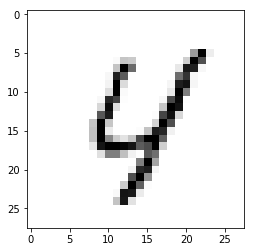

In [4]:
# Поменяйте номер ниже, чтобы посмотреть на различные примеры из тестового датасета
picture_num = 555

plt.imshow(X_test[picture_num], cmap="Greys"); 
print(y_test[picture_num])

In [0]:
def flatten_images(x):
    # Функция делает из прямоугольных изображений плоские, вытянутые в вектор длиной 28*28 = 784
    return x.reshape(x.shape[0], x.shape[1] * x.shape[2])

# "Плющим" все датасеты
X_train = flatten_images(X_train)
X_test = flatten_images(X_test)

def one_hot_labels(y):
    # Функция делает из ответов вида 1, 4, 7, 9 их one hot представление для подачи в нейронку
    result = np.zeros((y.size, 10))
    result[np.arange(y.size), y] = 1
    return result

# "Ванхотим" все ответы 
y_train_one_hot = one_hot_labels(y_train)
y_test_one_hot = one_hot_labels(y_test)

**My code**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
def perebor(max_depth, max_epochs):

  base_score = 0.9807
  callback = EarlyStopping(monitor='acc', min_delta=0, patience=3, verbose=1, mode='max', baseline=base_score, restore_best_weights=False)

  for i in range(1, max_depth):
    
    my_net = Sequential()
    my_net.add(Dense(int(2**(5+i+1)), activation='relu', input_dim=28*28))
    x = int(2**(5+i+1))
    
    for k in range(i+1):
      my_net.add(Dense(int((x/2**(k+1))), activation='relu'))
    
    my_net.add(Dense(10, activation='softmax'))
    
    my_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    for j in range(10, max_epochs): 
      my_history = my_net.fit(X_train, y_train_one_hot, batch_size=128, epochs=j,  
                  verbose=2, callbacks=[callback])
      
      my_net.summary()
      
      my_pred_one_hot = my_net.predict(X_test)
      my_pred_labels = np.argmax(my_pred_one_hot, axis=1)
      my_score = accuracy_score(y_test, my_pred_labels)
      print(my_score)
      
    if my_score > base_score:
        
      return my_net      
  
  return my_net

In [25]:
my_net_1 = perebor(3, 12)

Epoch 1/10
 - 3s - loss: 0.3563 - acc: 0.8946
Epoch 2/10
 - 2s - loss: 0.1320 - acc: 0.9607
Epoch 3/10
 - 2s - loss: 0.0906 - acc: 0.9726
Epoch 00003: early stopping
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
0.971
Epoch 1/11
 - 2s - loss: 0.0685 - acc: 0.9790
Epoch 2/11
 - 2s - loss: 0.0536 - acc: 0.9832
Epoc